# Activity 6 - Fundamental Fourier Transform in Python

Import the necessary libraries.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift

Create a composite signal consisting of three different sinewaves of varying frequencies and amplitude.

In [15]:
dt = 0.001 # Define the steps.
t = np.arange(0, 1, dt) # Generate array values from 0 to 1 with dt steps.
F = 50 # Set a frequency of 50 Hz.
sin1 = (5. * np.sin(2 * np.pi * F * t)) # First sinewave.
sin2 = (3 * np.sin(2 * np.pi * F * 3. * t)) # Second sinewave.
sin3 = (10 * np.sin(2 * np.pi * 10 * t)) # Third sinewave.
y = sin1 + sin2 + sin3 # Define the composite signal.
y

array([ 0.00000000e+00,  4.60004115e+00,  7.04542815e+00,  6.84594910e+00,
        5.47882570e+00,  5.09016994e+00,  6.67317235e+00,  9.22992887e+00,
        1.06096326e+01,  9.33040390e+00,  5.87785252e+00,  2.40210394e+00,
        1.05337525e+00,  2.31755032e+00,  4.71320560e+00,  6.09016994e+00,
        5.45135243e+00,  3.79093085e+00,  3.25617471e+00,  5.32562890e+00,
        9.51056516e+00,  1.36579676e+01,  1.56149683e+01,  1.48932830e+01,
        1.29721941e+01,  1.20000000e+01,  1.29721941e+01,  1.48932830e+01,
        1.56149683e+01,  1.36579676e+01,  9.51056516e+00,  5.32562890e+00,
        3.25617471e+00,  3.79093085e+00,  5.45135243e+00,  6.09016994e+00,
        4.71320560e+00,  2.31755032e+00,  1.05337525e+00,  2.40210394e+00,
        5.87785252e+00,  9.33040390e+00,  1.06096326e+01,  9.22992887e+00,
        6.67317235e+00,  5.09016994e+00,  5.47882570e+00,  6.84594910e+00,
        7.04542815e+00,  4.60004115e+00, -9.74275084e-15, -4.60004115e+00,
       -7.04542815e+00, -

Add noise to the composite signal.

In [16]:
noise = np.random.normal(0, 5, len(y)) # Generate the same number of random values as noise to the composite signal. 
ns = y + noise # Add the generated noise to create a noisy signal.

Plot the composite signal and and compare its form with added noise.

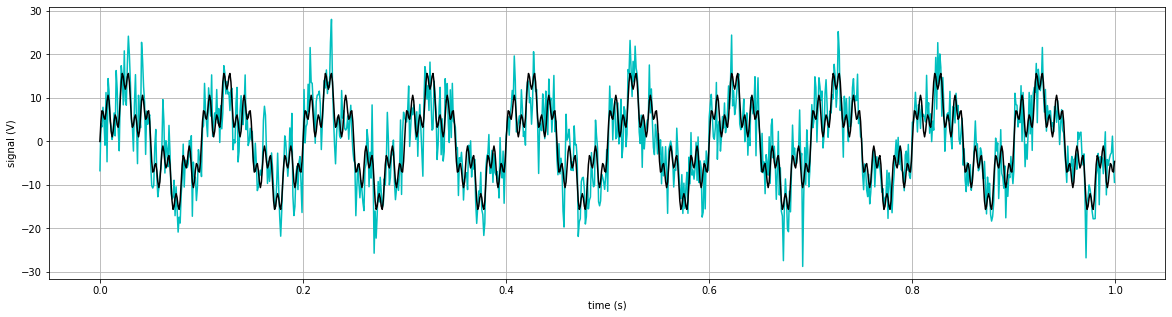

In [17]:
plt.figure(figsize=(20,5)) # Define plot size.
plt.grid(True) # Enable plot grid.
ax = plt.gca() # Get current axes.
plt.plot(t, ns, color='c') # Set color for noisy signal to cyan.
plt.plot(t, y, color='k') # Set color for the actual signal to black.
plt.xlabel("time (s)") # Set x label as time.
plt.ylabel("signal (V)") # Set y label as signal.
plt.show() # Show the plot.

In [10]:
n = len(y) # number of samples
n

1000

In [18]:
y_fft = np.fft.fft(y, n) # Fast fourier transform of y and number of samples.
freq = (1. / (dt * n)) * np.arange(n) # Frequencies.
psd = y_fft * np.conj(y_fft) / n # Power Spectral Density.
L = np.arange( 1., np.floor(n/2), dtype='int') # Round off to lowest whole number for y-axis representation.

c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


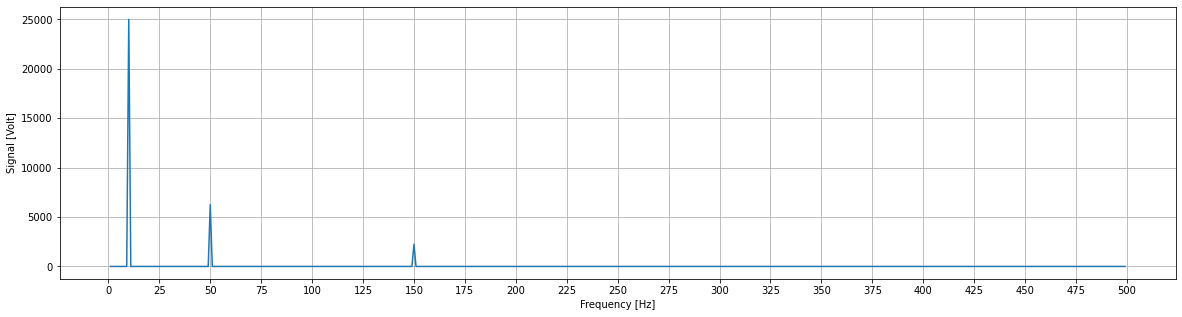

In [19]:
plt.figure(figsize=(20,5)) # Define plot size.
plt.grid(True) # Enable plot grid.
ax = plt.gca() # Get current axes.
ax.set_xticks(np.arange(0, len(freq) + 1, 25)) # Set the x ticks to increase the displayed x values in between intervals. 
plt.plot(freq[L], psd[L]) # Plot the frequencies as x and PSD as y.
plt.xlabel("Frequency [Hz]") # Set x label to frequency.
plt.ylabel("Signal [Volt]") # Set y label to signal.
plt.show() # Show the plot.